<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_W12_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import pandas
import pandas as pd

Display our JSON formatted three favorite books. 

JSON

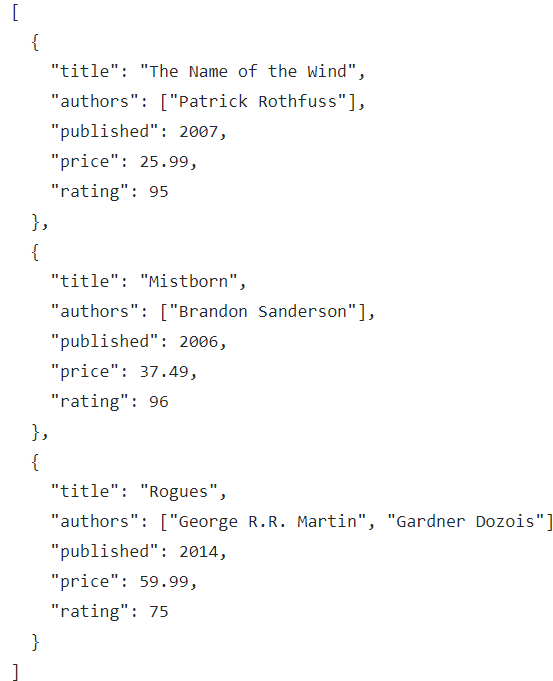

Create an alias json_df and assign it the JSON formated file on github via the pd.read_json function.
Show the results in a pandas dataframe.

In [2]:
#load the json file as a pandas dataframe
json_df = pd.read_json("https://raw.githubusercontent.com/Danjstr/AIM-5001/master/JSON_assn_12")
json_df

,title,authors,published,price,rating
0,The Name of the Wind,[Patrick Rothfuss],2007,25.99,95
1,Mistborn,[Brandon Sanderson],2006,37.49,96
2,Rogues,"[George R.R. Martin, Gardner Dozois]",2014,59.99,75


Display our HTML formated three favorite books. 

HTML

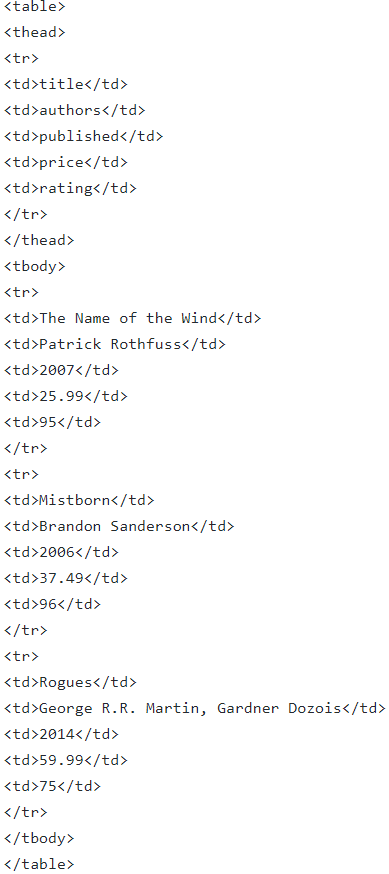

Create an html json_df and assign it the HTML formated file on github via the pd.read_html function.
Show the results in a pandas dataframe.

In [4]:
#load the html file as a pandas dataframe
html_df = pd.read_html("https://raw.githubusercontent.com/Danjstr/AIM-5001/master/HTML_assn_12")
html_df[0]

,title,authors,published,price,rating
0,The Name of the Wind,Patrick Rothfuss,2007,25.99,95
1,Mistborn,Brandon Sanderson,2006,37.49,96
2,Rogues,"George R.R. Martin, Gardner Dozois",2014,59.99,75


Display our XML formatted three favorite books. 

XML

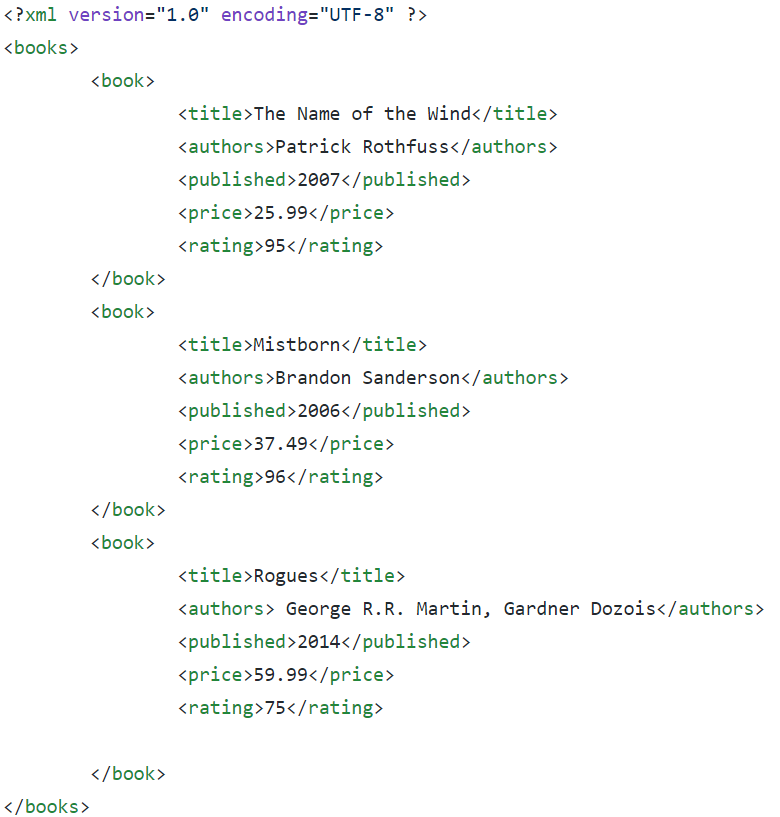

Showing an XML file as a dafaframe is more difficult than the examples above.

Import urllib.request and objectify.

In [5]:
# import urllib.request
import urllib.request

# load the objectify() function from the lxml library
from lxml import objectify

Retrieve the data from the provided url and store it in the two variables path and header. Parse the webpage then get the root of the xml file.

In [6]:
#Open the web page containing the XML data: Capture the header information separately from the path information
path, headers = urllib.request.urlretrieve('https://raw.githubusercontent.com/Danjstr/AIM-5001/master/XML_assn_12')

#Use the objectify function to parse the web page
parsed = objectify.parse(open(path))

#Get a reference to the root node of the XML file
root = parsed.getroot()

Define an empty list and use a for loop to iterate over the XML data.

In [9]:
# define an empty list that will be used to store the parsed data
data = []

# root.book is a generator that we use to extract each <book>
# element from the XML data
for elt in root.book:
     # for each record, create a dict of tag names (e.g., 'title')
    el_data = {}
    for child in elt.getchildren():
        el_data[child.tag] = child.pyval
        
    data.append(el_data)

Convert the result into a pandas dataframe then show it's head.

In [10]:
#Show the results
perf = pd.DataFrame(data)
perf.head()

,title,authors,published,price,rating
0,The Name of the Wind,Patrick Rothfuss,2007,25.99,95
1,Mistborn,Brandon Sanderson,2006,37.49,96
2,Rogues,"George R.R. Martin, Gardner Dozois",2014,59.99,75


API

In [11]:
#Import requests
import requests

Import Requests to make a url request using the .get function.

In [12]:
#Assign the url and attached API key to the variable url
url = 'https://api.nytimes.com/svc/mostpopular/v2/emailed/7.json?api-key=t8HDSSb6AwSTWcDulfGftWpXAnjoOdMx'
#Use the get function of the requests module to access the api
resp = requests.get(url)
resp

<Response [200]>

Use the .json function to convert our returned data into a JSON format. So we can work with it as a dictionary.

In [13]:
#Convert the result into a json format and save it as the variable data.
data = resp.json()
#show the type of the data
type(data)



dict

Turn the data from a dictionary into a pandas dataframe and show it's head.

In [14]:
#Turn the data from a dictinary into a  pandas dataframe.
dataframe = pd.DataFrame.from_dict(data)
#show the head of the dataframe.
dataframe.head()

,status,copyright,num_results,results
0,OK,Copyright (c) 2020 The New York Times Company....,20,{'uri': 'nyt://article/9ff9efc2-8c0c-57af-9ae9...
1,OK,Copyright (c) 2020 The New York Times Company....,20,{'uri': 'nyt://article/0fa6e451-17e3-54e9-af6c...
2,OK,Copyright (c) 2020 The New York Times Company....,20,{'uri': 'nyt://article/24b33394-25e6-5b51-ac0b...
3,OK,Copyright (c) 2020 The New York Times Company....,20,{'uri': 'nyt://article/85f40092-eb4e-5c56-9726...
4,OK,Copyright (c) 2020 The New York Times Company....,20,{'uri': 'nyt://article/2068d391-5ef8-50a7-9c84...
